## Graf z upoutávky na kurz

In [1]:
# Načteme knihovny
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [2]:
# Načíst data
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
# Převést sloupec 'continent' na kategorii aby se později dalo přiřadit barvu
data['continent']=pd.Categorical(data['continent'])

/Users/nasta/.virtualenvs/workshop/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


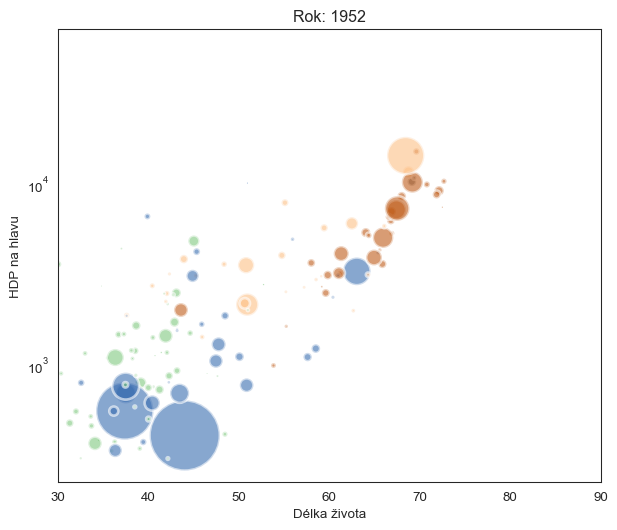

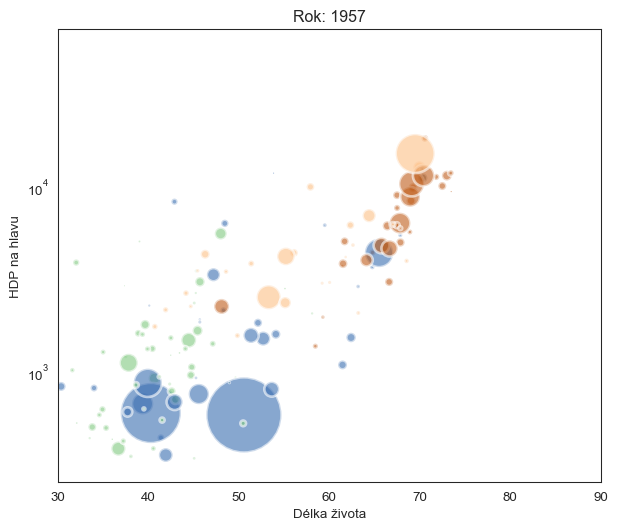

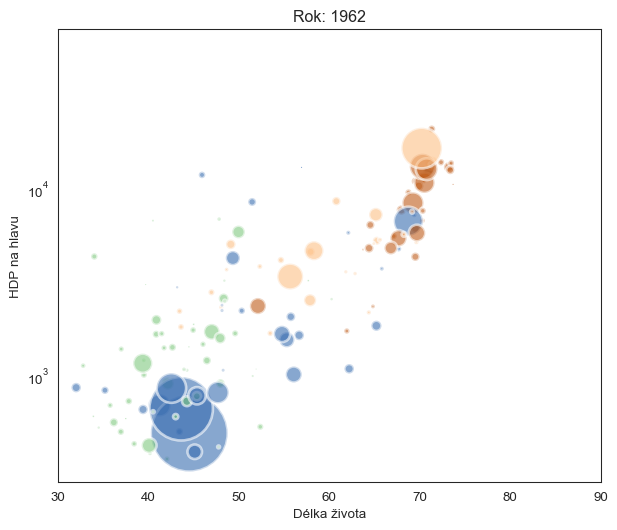

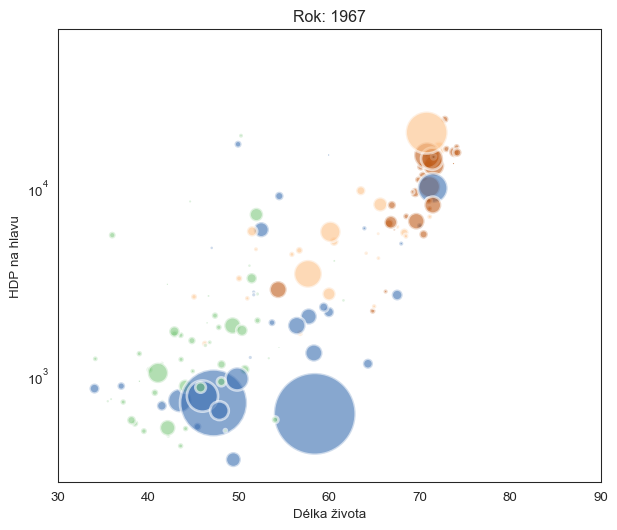

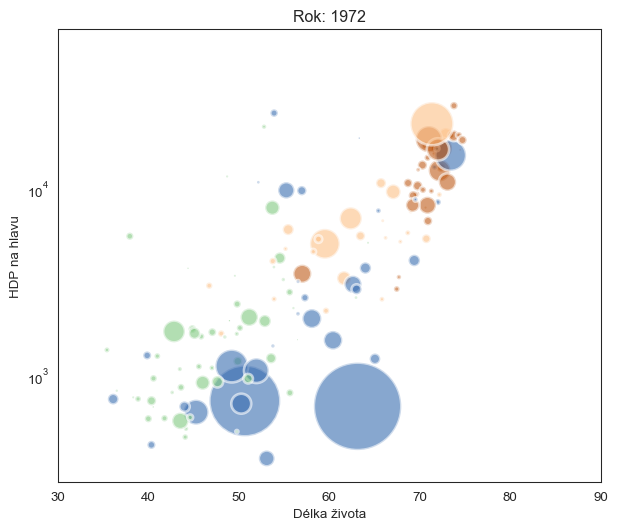

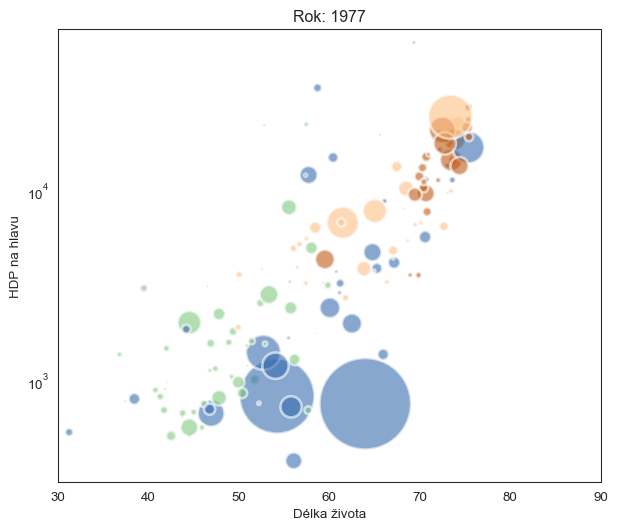

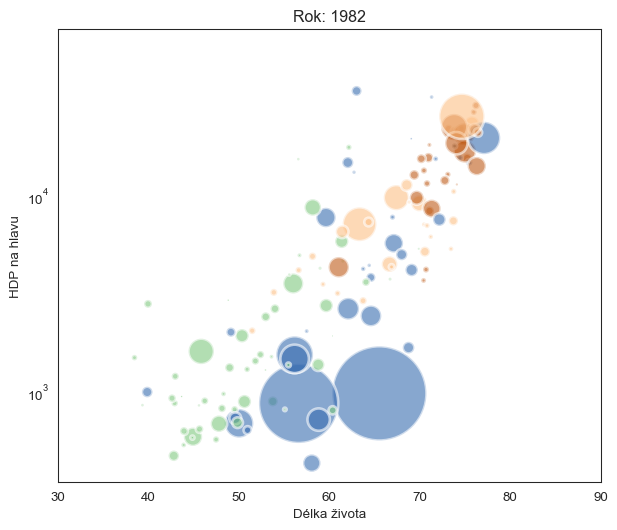

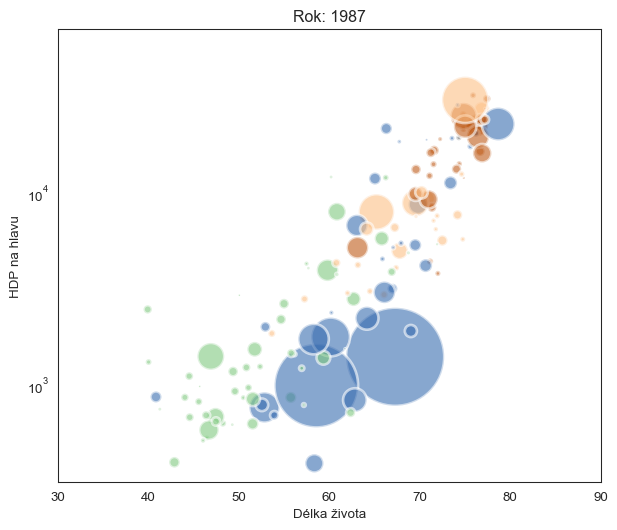

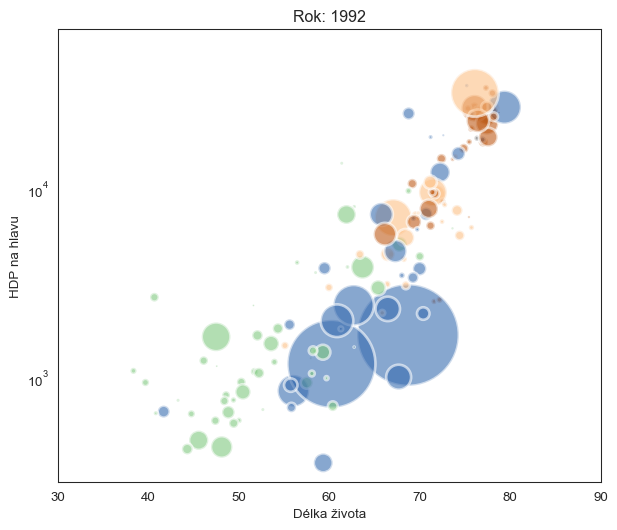

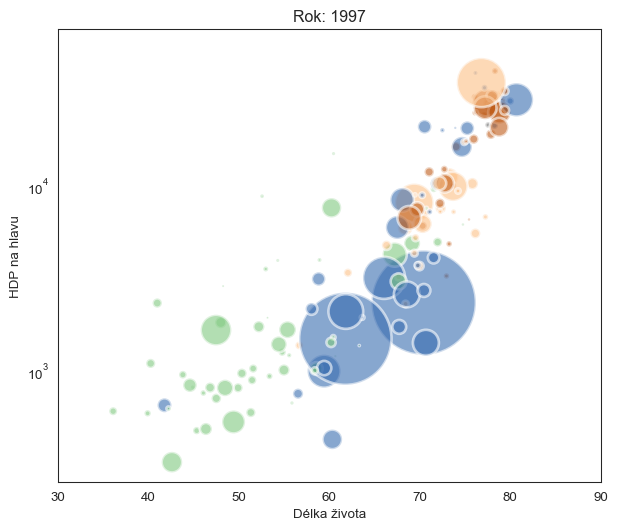

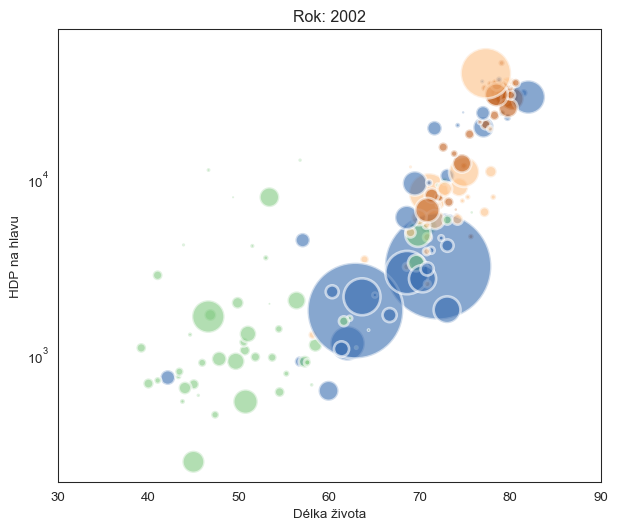

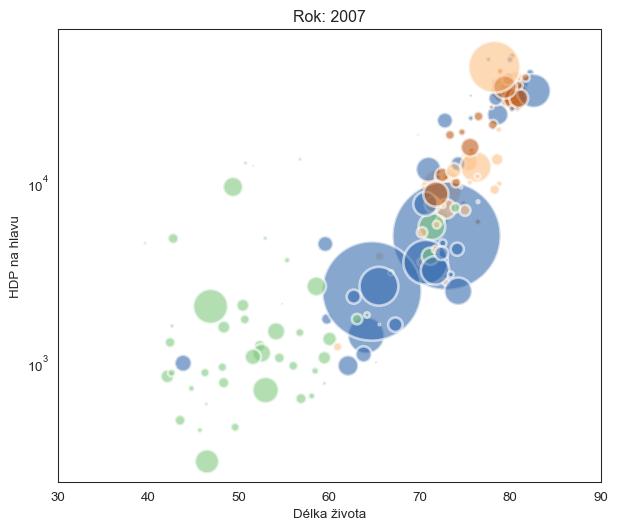

In [4]:
# Pro každý rok vykreslíme graf a uložíme ho jako png soubor
for i in data.year.unique():
 
    # Vytvoříme obrázek
    fig = plt.figure(figsize=(700/my_dpi, 600/my_dpi), dpi=my_dpi)

    # Každý kontinent bude mít jinou barvu dle čísla kategorie
    tmp=data[data.year == i]
    plt.scatter(
        tmp['lifeExp'], tmp['gdpPercap'], s=tmp['pop']/200000, 
        c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2
    )

    # Přidáme popisky
    plt.yscale('log')
    plt.xlabel("Délka života")
    plt.ylabel("HDP na hlavu")
    plt.title("Rok: " + str(i) )
    plt.ylim(-200, 70000)
    plt.xlim(30, 90)

    # Uložíme graf
    filename='Gapminder_cz_step'+str(i)+'.png'
    plt.savefig(filename, dpi=100, pad_inches=0.1, bbox_inches='tight')
    plt.gca()
